# Housing Prices Competition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

plt.style.use('seaborn')

# from zipfile import ZipFile

In [2]:
# with ZipFile('home-data-for-ml-course.zip') as zipObj:
#     zipObj.extractall()

In [3]:
# os.makedirs('data')

### Data overview

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [5]:
df = pd.concat([train, test])
df.loc[df['SalePrice'].isna(), 'SalePrice'] = 0

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


We can see that the test dataset does not contain the target, which is understandable, given the fact that we are testing our algorithm on this dataset. However, just for convenience I'd add the column called 'SalePrice' filled with zeros to even out the datasets. Later that column will be replaced with the predicted values for the houses.

In [8]:
tst_saleprice = np.zeros(len(test))

In [9]:
test['SalePrice'] = tst_saleprice

In [10]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0.0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0.0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0.0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,0.0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,0.0


Great, now both train and test datasets have the same number of columns. We can start exploring the training dataset to see what's in there.

### Train dataset exploration 

The dataset consists of many features, some of which require 'decoding'. Fortunately, there is a data_description.txt provided, and we can see what kind of information each of the column contains. 

From the file with the info about the features, we can see that we have many categorical features. Let's see them

In [11]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
categorical_columns = []
for i in range(len(df.dtypes)):
    if df.dtypes[i] == 'object':
#          print(i, train.dtypes.index[i])
        categorical_columns.append(train.dtypes.index[i])

In [14]:
len(categorical_columns)

43

In [15]:
df[categorical_columns]['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

Before passing the data through an algorithm, we have to deal with the NA values in the dataset. Looking at the output from the `.info()` function, we can see that PoolQC, Fence, MiscFeatures, FireplaceQu, Alley have a lot of missing values. Most of these variables are qualitative, and on top of that some of them are ordinal, therefore it is necessary to establish a [clear] relationship between examples. Especially the variables that contain "Quality" in their names suggest that there is some relationship between variables that gives a lot more information. In R, setting the order of the variables would be easy, in pandas we will have to resort to using the `factorize` function. But before that, let's subset the variables with the missing values, and see them up close.

In [16]:
missing_vars = np.where(df.isna().sum() > 0) # <- returns a tuple (even though the data type is list.
# to subset use missing_vars[0]

In [17]:
missing_subset = []
for idx,i in enumerate(df.columns):
    if idx in missing_vars[0]:
        missing_subset.append(i)

In [18]:
df[missing_subset]

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
1,RL,80.0,NaN,AllPub,MetalSd,MetalSd,None,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
2,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
3,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,None,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
4,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,NaN,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,WD
1455,RM,21.0,NaN,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,...,1970.0,Unf,1.0,286.0,TA,TA,NaN,NaN,NaN,WD
1456,RL,160.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,...,1960.0,Unf,2.0,576.0,TA,TA,NaN,NaN,NaN,WD
1457,RL,62.0,NaN,AllPub,HdBoard,Wd Shng,None,0.0,Gd,TA,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,MnPrv,Shed,WD


In [20]:
def missing_ratio(dataset):
    for i in dataset.columns:
        if dataset[i].isna().sum() > 0:
            print(f"{i} missing ratio: {np.round(dataset[i].isna().sum() / len(dataset[i]), 4)}")

In [21]:
missing_ratio(train)

LotFrontage missing ratio: 0.1774
Alley missing ratio: 0.9377
MasVnrType missing ratio: 0.0055
MasVnrArea missing ratio: 0.0055
BsmtQual missing ratio: 0.0253
BsmtCond missing ratio: 0.0253
BsmtExposure missing ratio: 0.026
BsmtFinType1 missing ratio: 0.0253
BsmtFinType2 missing ratio: 0.026
Electrical missing ratio: 0.0007
FireplaceQu missing ratio: 0.4726
GarageType missing ratio: 0.0555
GarageYrBlt missing ratio: 0.0555
GarageFinish missing ratio: 0.0555
GarageQual missing ratio: 0.0555
GarageCond missing ratio: 0.0555
PoolQC missing ratio: 0.9952
Fence missing ratio: 0.8075
MiscFeature missing ratio: 0.963


Okay, first let's deal with the variables for which the missing ratio is small, this should be straightforward as we can either use imputation, or just remove the values (however, removing the "problematic" variables on such a small dataset is not a good strategy). For example, the variable "MasVnrArea" contains only 8 values that are NaNs. Here, we can first check the distribution of that particular variable to decide if we want to impute the data with mean or median.

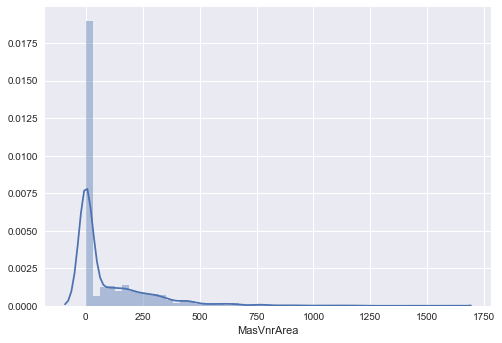

In [22]:
sns.distplot(train['MasVnrArea'])

Most of the values in that variable are zeros, though there is a huge right tail in there. Let's set those variables to be simply zeros

In [23]:
print(df['MasVnrArea'].mean())
print(df['MasVnrArea'].median())

102.20131215469613
0.0


In [24]:
df.loc[df['MasVnrArea'].isna(), 'MasVnrArea'] = 0

Great, that is out of the way. Let's look at the next variable that is 'MasVnrType'. Here we have a categorical variable for which imputation would not simply work. Let's look at a bar plot to decide what we can possibly do to remove the missing values 

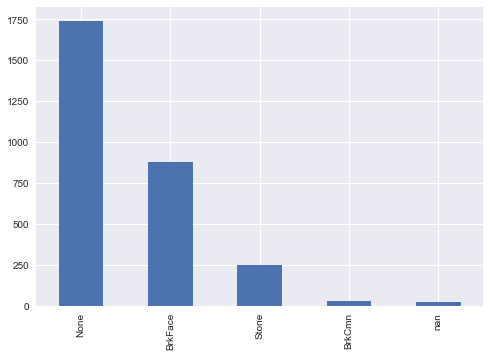

In [25]:
df['MasVnrType'].value_counts(dropna = False).plot(kind = 'bar')

Once again, there are eight values that do not contain any value. It is safe to assume that we can categorize them as "None" (it also would not be far from the truth :)

EDIT: Later I should check if the observations with missing values for MasVnrArea and MasVnrType are the same, because maybe I can find more discrepancies in the data. This attempt serves only as a starting point for later modeling performed on this dataset.

In [26]:
df.loc[df['MasVnrType'].isna(), 'MasVnrType']

234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
231     NaN
246     NaN
422     NaN
532     NaN
544     NaN
581     NaN
851     NaN
865     NaN
880     NaN
889     NaN
908     NaN
1132    NaN
1150    NaN
1197    NaN
1226    NaN
1402    NaN
Name: MasVnrType, dtype: object

In [27]:
df.loc[df['MasVnrType'].isna(), 'MasVnrType'] = 'None'

The only variable left for which the ratio is super small is "Electrical". Let's dive into this variable, and see what we got there.

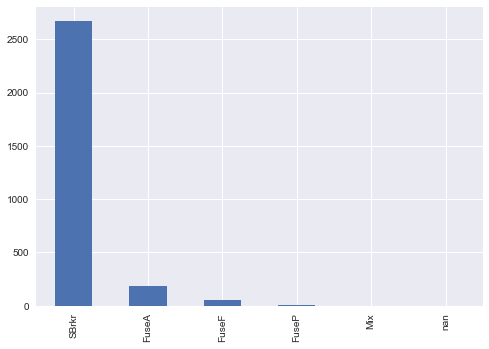

In [28]:
df['Electrical'].value_counts(dropna = False).plot(kind = 'bar')

There is only one observation with a missing value. Putting it in the SBrkr category would not change much.

In [29]:
df.loc[df['Electrical'].isna(), 'Electrical'] = 'SBrkr'

Now, onto the "behemoths" in the missing value department. This step will be crucial for our models to perform accurate predictions. For starters we are going to pick "Alley", "PoolQC", "MiscFeatures", "Fence". "MiscFeatures" will be the easiest of the bunch, because this is additional info (miscellaneous features). A quick glimpse into the dataset reveals that we have information here such as "Shed", "Other", "Gar2", "TenC". We can create an additional variable called "None", for houses that do not contain any information.


So far, the variables that should be transformed into Oridnal: Fence, Alley, PoolQC, FireplaceQu. MiscFeatures can be binarized.

In [30]:
df['MiscFeature'].value_counts(dropna = False)

NaN     2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [31]:
df.loc[df['MiscFeature'].isna(), 'MiscFeature'] = 'None'

Next up, "Fence" variable. Looking at the description of the dataset, this variable is classified as ordinal, because "Fence" refers to the quality of "Privacy". We can set the missing values to be NoFence, but it is important to set this variable as ordinal, because this will have an impact on the model and how well it predicts

In [32]:
df['Fence'].value_counts(dropna = False)

NaN      2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [33]:
df.loc[df['Fence'].isna(), 'Fence'] = 'No Fence'

In [34]:
import category_encoders as ce

In [35]:
train_ideas = train.copy()

In [36]:
fence_ord = ce.OrdinalEncoder(cols = ['Fence'])

In [37]:
train_ideas = fence_ord.fit_transform(train_ideas)

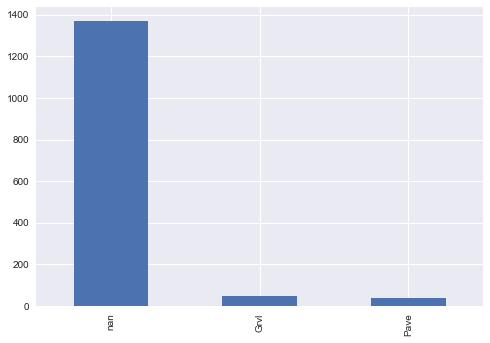

In [38]:
train['Alley'].value_counts(dropna = False).plot(kind = 'bar')

In [39]:
# We can perform the same operation as we did for the Fence variable. Paved access to property is much better than Gravel or No Alley for that matter

In [40]:
df.loc[df['Alley'].isna(), 'Alley'] = 'No Alley'

In [41]:
df.loc[df['PoolQC'].isna(), 'PoolQC'] = 'No Pool'

In [42]:
missing_ratio(df)

MSZoning missing ratio: 0.0014
LotFrontage missing ratio: 0.1665
Utilities missing ratio: 0.0007
Exterior1st missing ratio: 0.0003
Exterior2nd missing ratio: 0.0003
BsmtQual missing ratio: 0.0277
BsmtCond missing ratio: 0.0281
BsmtExposure missing ratio: 0.0281
BsmtFinType1 missing ratio: 0.0271
BsmtFinSF1 missing ratio: 0.0003
BsmtFinType2 missing ratio: 0.0274
BsmtFinSF2 missing ratio: 0.0003
BsmtUnfSF missing ratio: 0.0003
TotalBsmtSF missing ratio: 0.0003
BsmtFullBath missing ratio: 0.0007
BsmtHalfBath missing ratio: 0.0007
KitchenQual missing ratio: 0.0003
Functional missing ratio: 0.0007
FireplaceQu missing ratio: 0.4865
GarageType missing ratio: 0.0538
GarageYrBlt missing ratio: 0.0545
GarageFinish missing ratio: 0.0545
GarageCars missing ratio: 0.0003
GarageArea missing ratio: 0.0003
GarageQual missing ratio: 0.0545
GarageCond missing ratio: 0.0545
SaleType missing ratio: 0.0003


In [43]:
df.loc[df['FireplaceQu'].isna(), 'FireplaceQu'] = 'No Fireplace'

`LotFrontage` is a tricky one. Because most of the houses with missing `LotFrontage` have `LotArea` specified. For starters let's use imputation here. Good thing is that the distribution of the variable is pretty symmetrical

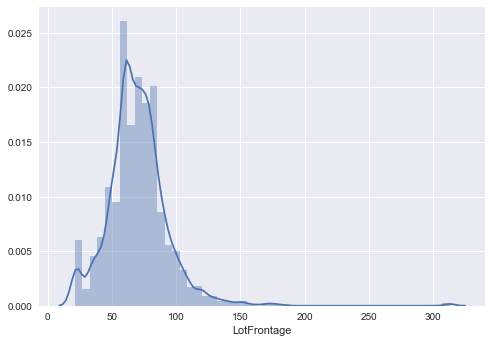

In [44]:
sns.distplot(train['LotFrontage'])

In [45]:
print(train['LotFrontage'].mean())
print(train['LotFrontage'].median())

70.04995836802665
69.0


In [46]:
df.loc[df['LotFrontage'].isna(), 'LotFrontage'] = df['LotFrontage'].median()

In [47]:
df[(df['BsmtQual']).isna() & (df['BsmtCond']).isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,Shed,500,10,2006,WD,Normal,90000.0
39,40,90,RL,65.0,6040,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,6,2008,WD,AdjLand,82000.0
90,91,20,RL,60.0,7200,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,7,2006,WD,Normal,109900.0
102,103,90,RL,64.0,7018,Pave,No Alley,Reg,Bnk,AllPub,...,0,No Pool,No Fence,None,0,6,2009,WD,Alloca,118964.0
156,157,20,RL,60.0,7200,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,6,2006,WD,Normal,109500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,2804,20,RL,100.0,21370,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,Shed,600,6,2006,WD,Normal,0.0
1344,2805,30,RL,55.0,8250,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,6,2006,WD,Normal,0.0
1364,2825,20,RL,80.0,12048,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,4,2006,WD,Normal,0.0
1431,2892,30,C (all),69.0,12366,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,10,2006,WD,Abnorml,0.0


In [48]:
print(df[df['BsmtCond'].isna()].index)
print(df[df['BsmtQual'].isna()].index)
# Same observations

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412,  125,  133,  269,  318,  354,  387,  388,
             396,  397,  398,  400,  455,  580,  590,  606,  608,  660,  662,
             725,  728,  729,  730,  733,  756,  764,  927,  975,  992,  993,
            1030, 1038, 1064, 1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306,
            1343, 1344, 1364, 1431, 1444],
           dtype='int64')
Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412,  125,  133,  269,  318,  354,  387,  388,
             396,  397,  398,  400,  455,  590,  606,  608,  660,  662,  

In [49]:
df.loc[(df['BsmtCond']).isna() & (df['BsmtQual']).isna(), ['BsmtCond', 'BsmtQual']] = 'No Basement'

In [50]:
train[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,Attchd,2003.0,RFn,TA,TA
1,Attchd,1976.0,RFn,TA,TA
2,Attchd,2001.0,RFn,TA,TA
3,Detchd,1998.0,Unf,TA,TA
4,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...
1455,Attchd,1999.0,RFn,TA,TA
1456,Attchd,1978.0,Unf,TA,TA
1457,Attchd,1941.0,RFn,TA,TA
1458,Attchd,1950.0,Unf,TA,TA


In [51]:
df.loc[df['GarageType'].isna(), 'GarageType'] = 'No Garage'

In [52]:
df.loc[df['GarageFinish'].isna(), 'GarageType'] = 'No Garage'

In [53]:
train_ideas.loc[train_ideas['GarageYrBlt'].isna(), 'GarageYrBlt'] = 0

Another tricky problem is the GarageYrBlt. How do we deal with houses that do not have the garages? Setting the variable to zero would change completely the distribution of the variable, and would introduce an unwanted value, which is zero. For now, I am going to leave this as is, i.e. with zero as values for the GarageYrBlt. I will look further into it later.

In [54]:
df.loc[df['GarageYrBlt'].isna(), 'GarageYrBlt'] = 0

In [55]:
df.loc[(df['GarageFinish']).isna() & (df['GarageQual']).isna() & (df['GarageCond']).isna(), ['GarageFinish', 'GarageQual', 'GarageCond']] = 'No Garage'

Okay, as excpected, the observations that have missing values in variables with "GarageXXX" in them are the same ones that did not have the info about YrBlt or Type or Finish.

In [56]:
df.loc[df['BsmtExposure'].isna(), 'BsmtExposure'] = 'No Basement'
df.loc[df['BsmtFinType1'].isna(), 'BsmtFinType1'] = 'No Basement'
df.loc[df['BsmtFinType2'].isna(), 'BsmtFinType2'] = 'No Basement'
df.loc[df['BsmtQual'].isna(), 'BsmtQual'] = 'No Basement'
df.loc[df['BsmtCond'].isna(), 'BsmtCond'] = 'No Basement'
df.loc[df['BsmtFinSF1'].isna(), 'BsmtFinSF1'] = 0
df.loc[df['BsmtFinSF2'].isna(), 'BsmtFinSF2'] = 0
df.loc[df['BsmtUnfSF'].isna(), 'BsmtUnfSF'] = 0
df.loc[df['TotalBsmtSF'].isna(), 'TotalBsmtSF'] = 0
df.loc[df['BsmtFullBath'].isna(), 'BsmtFullBath'] = 0
df.loc[df['BsmtHalfBath'].isna(), 'BsmtHalfBath'] = 0

In [57]:
df.loc[df['KitchenQual'].isna(), 'KitchenQual'] = 'TA'

In [58]:
df.loc[(df['GarageArea'].isna()) & (df['GarageCars'].isna()), ['GarageArea', 'GarageCars']] = 0

In [59]:
df.loc[df['MSZoning'].isna(), 'MSZoning'] = 'None'
df.loc[df['Utilities'].isna(), 'Utilities'] = 'None'

In [60]:
df.loc[(df['Exterior1st'].isna()) & (df['Exterior2nd'].isna()), ['Exterior1st', 'Exterior2nd']] = 'None'

In [61]:
df.loc[df['SaleType'].isna(), 'SaleType'] = 'Oth'

In [62]:
df.loc[df['Functional'].isna(), 'Functional'] = 'Typ'

In [63]:
missing_ratio(df)

In [79]:
numerics = []

for i in df:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        numerics.append(i)

In [82]:
var_corr = df[numerics].corr()

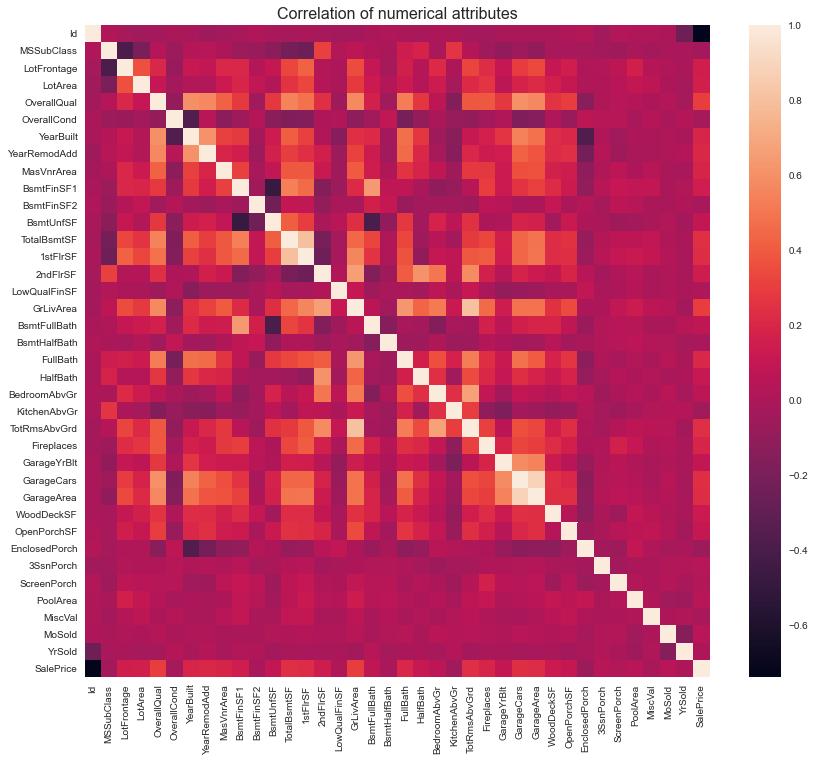

In [90]:
f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(var_corr)
plt.show() # drop the id col

In [154]:
ordinal_features = ['Fence', 'BsmtExposure', 
                                             'BsmtFinType1','BsmtQual', 'BsmtCond', 'BsmtFinType2', 'GarageFinish',
                                             'GarageQual', 'GarageCond', 'GarageType', 'FireplaceQu', 'PoolQC', 'Alley',
                                             'MasVnrType', 'Electrical', 'MSZoning', 'SaleType', 'SaleCondition']
for i in categorical_columns:
    if 'Qu' in i:
        ordinal_features.append(i)

In [157]:
ordinal_variables = ce.OrdinalEncoder(cols = ordinal_features)

In [158]:
df = ordinal_variables.fit_transform(df)

In [159]:
one_hot_features = []

for i in categorical_columns:
    if i not in ordinal_features:
        one_hot_features.append(i)

In [454]:
one_hot_vars = ce.OneHotEncoder(cols = categorical_columns)

In [455]:
df = one_hot_vars.fit_transform(df)
# df.to_csv('Df_transformed.csv')

In [489]:
df.dtypes[10]

dtype('int64')

In [495]:
nums = []
for idx,i in enumerate(df):
    if df.dtypes[i] == 'float64':
        nums.append(i)

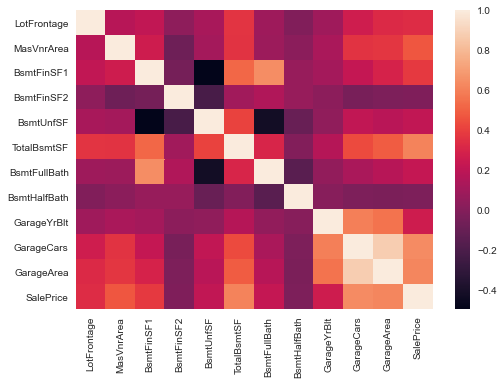

In [499]:
correlation = train[nums].corr()

sns.heatmap(correlation)

### Splitting the data, initial modeling

In [502]:
train = df[:1460]
test = df[1460:]

In [503]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [504]:
X = train.drop(['SalePrice', 'TotalBsmtSF', 'GarageCars', 'GarageArea'], axis = 1)
y = train['SalePrice']

In [505]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [506]:
tree_regressor = DecisionTreeRegressor(random_state = 42, max_depth = 5,
                                      max_features=20, min_samples_split=25)

In [507]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=20, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=25,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [510]:
tree_regressor.score(X_test, y_test)

0.5069642060852115

In [511]:
param_grid = {'max_depth': [5, 8, 10, 15],
             'max_features': [5,10,15,20,25,30],
             'min_samples_split': [10, 15, 20, 25,30,35],
             }

In [512]:
from sklearn.model_selection import GridSearchCV

In [513]:
grid_search = GridSearchCV(tree_regressor, param_grid, scoring = 'r2', cv=5)

In [514]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=5, max_features=20,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=25,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 8, 10, 15],
                         'max_features': [5, 10, 15, 20, 25, 30],
                         'min_samples_split': [10, 15, 20, 25, 30, 35]},
             

In [515]:
grid_search.best_estimator_.score(X_test, y_test)

0.6864639203970773

In [516]:
grid_search.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=30, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=30,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [588]:
predictions_test = tree_regressor.predict(X_test)

In [589]:
len(predictions_test)

292

In [590]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0.0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0.0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0.0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,0.0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0.0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0.0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0.0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,0.0


In [517]:
import xgboost as xgb

In [518]:
xgb_regr = xgb.XGBRFRegressor(random_state=42, n_jobs = -1, max_depth = 10,
                             n_estimators = 200, num_parallel_tree = 200)

In [519]:
xgb_regr.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
               colsample_bynode=0.8, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints=None,
               learning_rate=1, max_delta_step=0, max_depth=10,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               n_estimators=200, n_jobs=-1, num_parallel_tree=200,
               objective='reg:squarederror', random_state=42, reg_alpha=0,
               reg_lambda=1e-05, scale_pos_weight=1, subsample=0.8,
               tree_method=None, validate_parameters=False, verbosity=None)

In [520]:
param_grid = {'max_depth':[5,6,7,8,9,10],
              'n_estimators': [100,200,300,400]}

In [522]:
xgb_regr.score(X_test, y_test)

0.8308424575120342

In [523]:
grid_xbg = GridSearchCV(xgb_regr, param_grid, scoring='r2', cv=5)

In [524]:
grid_xbg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRFRegressor(base_score=0.5, booster=None,
                                      colsample_bylevel=1, colsample_bynode=0.8,
                                      colsample_bytree=1, gamma=0, gpu_id=-1,
                                      importance_type='gain',
                                      interaction_constraints=None,
                                      learning_rate=1, max_delta_step=0,
                                      max_depth=10, min_child_weight=1,
                                      missing=nan, monotone_constraints=None,
                                      n_estimators=200, n_jobs=-1,
                                      num...
                                      objective='reg:squarederror',
                                      random_state=42, reg_alpha=0,
                                      reg_lambda=1e-05, scale_pos_weight=1,
                                      subsample=0.8, tree_me

In [525]:
grid_xbg.best_estimator_.n_jobs = -1

In [526]:
grid_xbg.best_estimator_.score(X_test, y_test)

0.8274556647614005

In [200]:
X_tst = test.drop('SalePrice', axis = 1)
y_tst_preds = grid_xbg.best_estimator_.predict(X_tst)

In [203]:
X_tst['SalePrice'] = y_tst_preds

In [210]:
submission = X_tst[['Id', 'SalePrice']]
submission = submission.set_index('Id')

In [212]:
submission.to_csv('submission_1.csv')

In [211]:
submission

,SalePrice
Id,
1461,128763.851562
1462,152467.906250
1463,180037.781250
1464,185419.734375
1465,194842.484375
...,...
2915,91284.140625
2916,97406.156250
2917,154018.031250


In [259]:
# X_train_idx = X_train['Id']
# X_test_idx = X_test['Id']
# # X_train = X_train.drop('Id', axis = 1)
# # X_test = X_test.drop('Id', axis = 1)

In [261]:
X_test_idx = X_test['Id']
X_test = X_test.drop('Id', axis = 1)

In [299]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

In [311]:
param = {'max_depth': 10, 
         'eta': 1,
         'num_parallel_tree': 100,
         'objective': 'reg:squarederror'}
param['eval_metric'] = 'rmsle'

In [312]:
num_round = 20
bst = xgb.train(param, dtrain, num_round)

In [323]:
bst.get_score()

{'OverallQual': 5300,
 'GrLivArea': 9500,
 'TotalBsmtSF': 8700,
 'CentralAir_1': 300,
 'BsmtCond': 900,
 'GarageArea': 7700,
 'OverallCond': 3500,
 'YearBuilt': 10200,
 'GarageCars': 600,
 'KitchenAbvGr': 100,
 'GarageType': 1800,
 'Alley': 700,
 'LotFrontage': 29500,
 'BsmtFinSF1': 11000,
 'LotArea': 22400,
 'Neighborhood_3': 400,
 'BsmtFinType1': 4200,
 'SaleCondition': 1300,
 'MasVnrType': 2300,
 'OpenPorchSF': 7500,
 'BsmtFinSF2': 600,
 'Neighborhood_6': 400,
 'LotConfig_1': 2500,
 'YearRemodAdd': 5700,
 'Exterior1st_1': 900,
 'BsmtUnfSF': 12600,
 'HeatingQC_3': 900,
 'MSSubClass': 28500,
 '1stFlrSF': 9000,
 'WoodDeckSF': 5100,
 'ScreenPorch': 800,
 'MoSold': 8200,
 'GarageFinish': 2300,
 'LotShape_1': 3000,
 'LandContour_1': 1300,
 'KitchenQual': 1300,
 'Exterior1st_8': 500,
 'Exterior2nd_12': 100,
 'SaleType': 1300,
 'MasVnrArea': 5400,
 'Neighborhood_11': 900,
 'HouseStyle_8': 100,
 '2ndFlrSF': 3300,
 'MSZoning': 5600,
 'HeatingQC_2': 800,
 'GarageYrBlt': 3500,
 'PoolArea': 300,

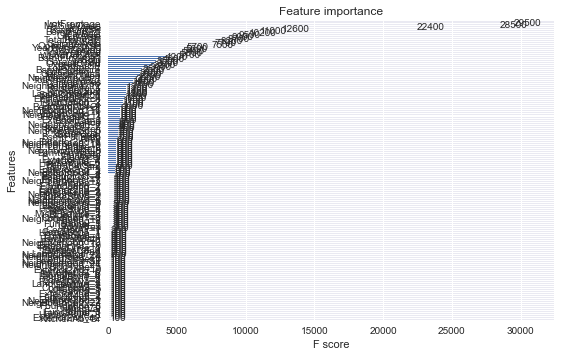

In [313]:
xgb.plot_importance(bst)

In [303]:
from sklearn.metrics import mean_squared_error

In [314]:
test_preds = bst.predict(dtest)

In [298]:
mean_squared_error(y_test, test_preds)

1672378834.6281443

In [305]:
mean_squared_error(y_test, test_preds)

1672348010.2345

In [267]:
X_tst_bst = X_tst.drop('Id', axis = 1)

In [270]:
X_tst_bst = X_tst_bst.drop('SalePrice', axis = 1)

In [272]:
X_tst_bst = xgb.DMatrix(X_tst_bst)

In [316]:
preds = bst.predict(X_tst_bst)

In [317]:
submission_2 = pd.DataFrame(X_tst['Id'])

In [318]:
submission_2['SalePrice'] = preds

In [319]:
submission_2 = submission_2.set_index('Id')
submission_2.to_csv('xgb_submission.csv')